In [30]:
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns

col_names_test = ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
col_names_train = ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Read in Datasets
df_train = pd.read_csv('./data/trainingset.txt', 
                 names=col_names_test,
                 na_values="?",
                 index_col='id')

df_test = pd.read_csv('./data/queries.txt', 
                 names=col_names_train,
                 na_values="?",
                 index_col='id')

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24318 entries, TR1 to TR24318
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        24318 non-null  int64 
 1   job        24318 non-null  object
 2   marital    24318 non-null  object
 3   education  24318 non-null  object
 4   default    24318 non-null  object
 5   balance    24318 non-null  int64 
 6   housing    24318 non-null  object
 7   loan       24318 non-null  object
 8   contact    24318 non-null  object
 9   day        24318 non-null  int64 
 10  month      24318 non-null  object
 11  duration   24318 non-null  int64 
 12  campaign   24318 non-null  int64 
 13  pdays      24318 non-null  int64 
 14  previous   24318 non-null  int64 
 15  poutcome   24318 non-null  object
 16  y          24318 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.3+ MB


In [32]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
TR1,44,JobCat9,single,secondary,no,29,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
TR2,31,JobCat4,married,secondary,no,2,yes,yes,unknown,5,may,0,1,-1,0,unknown,TypeA
TR3,42,JobCat4,divorced,tertiary,yes,2,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
TR4,58,JobCat2,married,primary,no,121,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA
TR5,43,JobCat9,single,secondary,no,593,yes,no,unknown,5,may,0,1,-1,0,unknown,TypeA


# Data Exploration

- Mean Age is approx. 40 years old. (Minimun: 16 years old and Maximum: 95 years old)
- The mean balance for the training data is 1,347 and 1,397 for the test data. 
- Duration is always 0

In [33]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,24318.000000,24318.000000,24318.000000,24318.0,24318.000000,24318.000000,24318.000000
mean,39.907723,1347.709968,15.765071,0.0,2.769060,41.085945,0.591126
std,11.438238,2944.383929,8.273208,0.0,3.068752,100.490570,1.976166
min,16.000000,-8019.000000,1.000000,0.0,1.000000,-1.000000,0.000000
25%,31.000000,75.000000,8.000000,0.0,1.000000,-1.000000,0.000000
50%,37.000000,451.000000,16.000000,0.0,2.000000,-1.000000,0.000000
75%,48.000000,1420.250000,21.000000,0.0,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,0.0,63.000000,842.000000,58.000000


In [34]:
df_train['balance'].median()

451.0

In [35]:
df_train['balance'].mode()

0    0
dtype: int64

In [36]:
# Look at the subscribe rate for numerical values
pd.pivot_table(df_train, index = 'y', values = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])

,age,balance,campaign,day,duration,pdays,previous
y,,,,,,,
TypeA,39.833868,1291.913840,2.851314,15.873273,0,36.933938,0.500907
TypeB,40.470067,1772.555083,2.142756,14.941197,0,72.700319,1.278073


In [37]:
df_age=df_train[["age","y"]]
df_balance=df_train[["balance","y"]]
df_day=df_train[["day","y"]]
df_marital=df_train[["marital","y"]]
df_job=df_train[["job","y"]]

In [38]:
df_job.describe()

,job,y
count,24318,24318
unique,12,2
top,JobCat3,TypeA
freq,5197,21495


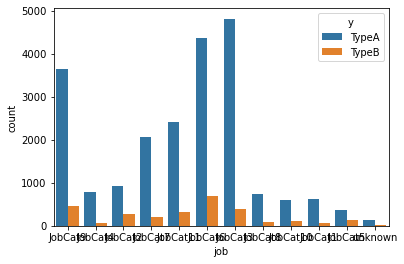

In [39]:
sns.countplot(x="job",hue="y",data=df_train)
plt.show()

In [40]:
df_marital.describe()

,marital,y
count,24318,24318
unique,3,2
top,married,TypeA
freq,14639,21495


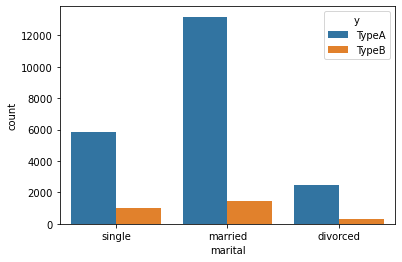

In [41]:
sns.countplot(x="marital",hue="y",data=df_train)
plt.show()


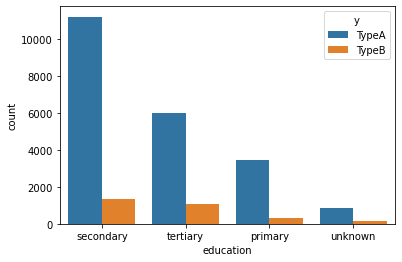

In [42]:
sns.countplot(x="education",hue="y",data=df_train)
plt.show()

## Let's look at balance

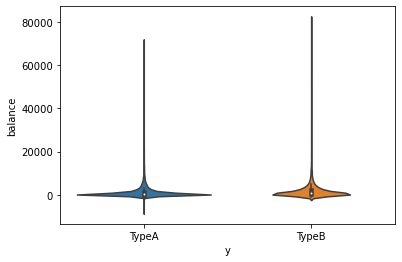

In [43]:
sns.violinplot(x="y",y="balance",data=df_balance)
plt.show()

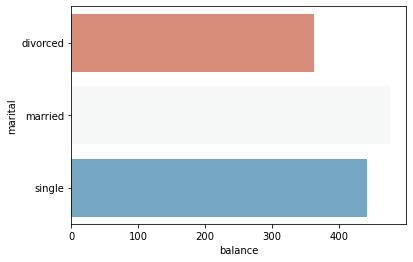

In [44]:
marital_groups = df_train.groupby(['marital'], as_index=False)['balance'].median()

sns.barplot(x="balance", y="marital", data=marital_groups,
            label="Total", palette="RdBu")

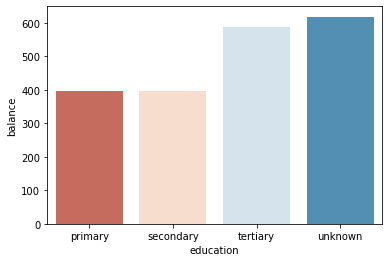

In [45]:
education_groups = df_train.groupby(['education'], as_index=False)['balance'].median()

sns.barplot(x="education", y="balance", data=education_groups,
            label="Total", palette="RdBu")

# Data Cleaning


In [46]:
# Let's split the columns up into numeric and categorical data
train_num = df_train[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
test_num = df_test[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

train_cat = df_train[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']]
test_cat = df_test[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']]

In [47]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [48]:
num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

y_train = df_train['y']

y_train = y_train.replace('TypeA', '0')
y_train = y_train.replace('TypeB', '1')

y_train = y_train.astype(float)

# Pre-process Data

In [49]:
num_features = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

y_train = df_train['y']

y_train = y_train.replace('TypeA', '0')
y_train = y_train.replace('TypeB', '1')

y_train = y_train.astype(float)

X_train_cat = pd.get_dummies(df_train[cat_features])
X_test_cat = pd.get_dummies(df_test[cat_features])

X_train_num = df_train[num_features]
X_test_num = df_test[num_features]

# Classification Models:

- KNearestNeighbours
- Decision Tree
- Naives Bayes

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train_cat, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train_cat, y_train, cv=3)
tree_mean = tree_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train_cat, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Categorical KNN', 'Categorical Dec Tree','Categorical Naives Bayes'], 
    'Crossval Mean Scores': [knn_mean, tree_mean, nav_mean]}

result_df_cat = pd.DataFrame(data=d)

In [51]:
# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train_num, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train_num, y_train, cv=3)
tree_mean = tree_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train_num, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Numerical KNN', 'Numerical Dec Tree','Numerical Naives Bayes'], 
    'Crossval Mean Scores': [knn_mean, tree_mean, nav_mean]}

result_df_num = pd.DataFrame(data=d)

In [52]:
df_results = result_df_num.append(result_df_cat)

In [53]:
print(df_results.sort_values(by='Crossval Mean Scores', ascending=False))

                Classifiers  Crossval Mean Scores
0             Numerical KNN              0.818201
2    Numerical Naives Bayes              0.786701
1        Numerical Dec Tree              0.676536
0           Categorical KNN              0.547413
2  Categorical Naives Bayes              0.497574
1      Categorical Dec Tree              0.392795


In [54]:
# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train_num, y_train, cv=3)
knn_mean = knn_scores.mean()

knn_clf.fit(X_train_num, y_train)
prediction = knn_clf.predict(X_test_num)

# Confusion Matrix

Accuracy= 0.8743832236842105
[[8410  193]
 [1029   96]]





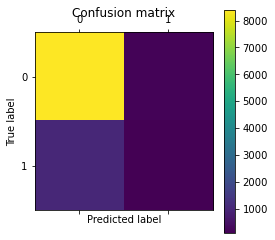

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

knn_clf2 = KNeighborsClassifier()
#Split the data: 60% training : 40% test set
instances_train, instances_test, target_train, target_test = train_test_split(X_train_num, y_train, test_size=0.4, random_state=0)
#fit the model using just the test set
knn_clf2.fit(instances_train, target_train)
#Use the model to make predictions for the test set queries
predictions_2 = knn_clf2.predict(instances_test)
#Output the accuracy score of the model on the test set
print("Accuracy= " + str(accuracy_score(target_test, predictions_2, normalize=True)))
#Output the confusion matrix on the test set
confusionMatrix = confusion_matrix(target_test, predictions_2)
print(confusionMatrix)
print("\n\n")

#Draw the confusion matrix
import matplotlib.pyplot as plt
# Show confusion matrix in a separate window
plt.matshow(confusionMatrix)
#plt.plot(confusionMatrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve
The ROC curve tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The X-axis is represented by False positive rates (Specificity) and the Y-axis is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.

In [56]:
# Hold the False Positve Rates
fpr = {}

# Hold the True Postive Rates
tpr = {}

# Hold the Thresholds
thresholds = {}

# Hold the ROC data
roc_auc = {}

# Variables to hold TPR, FPR, Thresholds
model_types = {
    'knn': 'K Nearest Neighbours'
}

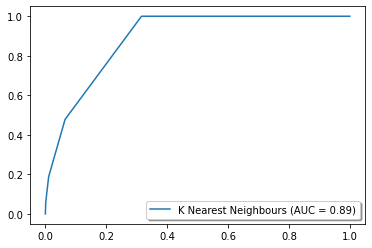

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# ROC curve data
probs_knn = knn_clf.predict_proba(X_train_num)
fpr['knn'], tpr['knn'], thresholds['knn'] = roc_curve(y_train, probs_knn[:, 1])
roc_auc['knn'] = auc(fpr['knn'], tpr['knn'])

# Plotting all ROC curves together
fig, ax = plt.subplots()
for classification in ['knn']:    
    ax.plot(fpr[classification], tpr[classification], 
             label='{0:s} (AUC = {1:0.2f})'''.format(model_types[classification], 
                                                     roc_auc[classification]))
legend = ax.legend(loc='lower right', shadow=True)

# Export Data

In [68]:
predictions = pd.DataFrame(data= prediction)

predictions = predictions.replace(0, 'TypeA')
predictions = predictions.replace(1, 'TypeB')

predict_id = pd.DataFrame(data=df_test.index)
predictions = predict_id.merge(predictions, left_index=True, right_index=True)
predictions.columns = ['Id', 'Type']

predictions.to_csv('./prediction.csv', index=False)